# init

In [ ]:
# init
import numpy as np
from scipy.interpolate import CubicSpline
def newtonInt(x, y, xx):
  """
  newtonInt: Newton interpolating polynomials

  newtonInt(x,y,xx): Uses an (n - 1)th order Newton interpolating polynomials
  using n data points (x, y) to determine the intermediate yy value at a given
  xx independent varialble value
  Input:
    x: independent variable
    y: dependent variable
    xx: intermediate value of the independent variable
  Output:
    yy = interpolated value of dependent variable
  """
  # check if x and y vectors have the same length. If not show an error message
  assert x.shape[0] == y.shape[0], "x and y lengths are not the same"
  n = x.shape[0]  # number of elements in x
  # Building the difference table
  b = np.zeros((n,n),float)  # initiate the difference table as a nxn matrix containing zeros
  b[:,0] = y  # assign y to the first column of b
  for col in range(1,n):         #loop over columns
    for row in range(0,n-col):   #loop over rows
      b[row,col] = (b[row+1, col-1] - b[row, col-1]) / (x[row+col] - x[row])  # divided differences
  # At this point the difference table is created    
  # Using the difference table to interpolate
  prod = 1.
  yy = b[0,0]
  for i in range(0,n-1):
    prod = prod * (xx - x[i])   # product of x differences
    yy = yy + b[0, i+1] * prod  # calculating the interpolated values
  return yy

def lagrangeInt(x, y, xx):
    """
    lagrangeInt: Lagrange interpolating polynomial

    lagrangeInt(x,y,xx): Uses an (n - 1)th order Lagrange interpolating polynomials
    using n data points (x, y) to determine the intermediate yy value at a given
    xx independent varialble value
    Input:
      x: independent variable
      y: dependent variable
      xx: intermediate value of the independent variable
    Output:
      yy = interpolated value of dependent variable
    """
    import numpy as np
    # check if x and y vectors have the same length. If not show an error message
    assert x.shape[0] == y.shape[0], "x and y lengths are not the same"
    n = x.shape[0]  # number of elements in x
    sum = 0.
    for i in range(n):
        product = y[i]      #set product=y(i) initially
        for j in range(n):  #calculate the product 
            if i != j:      #for all j values except for i=j
                product = product * (xx - x[j]) / (x[i] - x[j])  #calculating the Li * yi terms
        sum = sum + product
    yy = sum
    return yy

# Q1

The following data has been measured in an experiment and it is known that the data can be modeled by this equation
$ x=e^{(y-b)/a}$ where $a$ and $b$ are unknown parameters. Use nonlinear regression to determine $a$ and $b$. Plot the data together with the regression line. Report the $r^2$ values. Based on your analysis find $x$ at $y=2.6$.
\begin{align*}
&x&&1 &&2 &&3 &&4&&5\\
&y&&0.5 &&2 &&2.9 &&3.5 &&4
\end{align*}

Optimization terminated successfully.
         Current function value: 0.000895
         Iterations: 61
         Function evaluations: 117
Regression parameters: a=  2.1730148146932313 and b=  0.4992730014904335


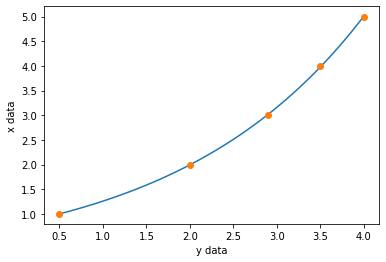

r2 =  0.9999105361745361
0.0008946382546392296
10.0
x for y = 2.6 is :  2.629342617118168


In [ ]:
# Q1 Answer
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

def sr_func(a, x, y):
  """
  Calculates the total regression error

  sr_func(a, x, y)
  Returns the total regression error
  Input:
    a: array of regression parameters
    x : the independant variable data
    y : the dependant variable data
  Output:
    sr: total regression error
  """    
  y_reg = np.exp((x-a[1])/a[0])       # regression function: F = a0 * v**a1
  sr = np.sum((y - y_reg)**2)  # total regression error
  return sr



F = np.array([1., 2., 3., 4., 5.],float)
v = np.array([.5, 2, 2.9, 3.5, 4.],float)
f = lambda a1, v1, F1: sr_func(a1, v1, F1)  # v1 and F1 are lambda function variables corresponding to v and F data;
                                            # these are used by fmin to pass the data to the sr_func function
                                            # a1 lambda function variable corresponds to a (array of regression constants)

a0 = [1,1]  # inital guess for "a" array (consistent with the shape of a)

# - fmin is used for multi-variate optimization to minimize the total regression error
# - f is a lambda function to the sr_func which returns the total regression error
# - a0 is the initial guess which is consistent with the shape of a
# - the data v, F are passed to fmin as tuples using the args input aurgument
#    fmin passes these parameters to the lambda function which then
#    passes them to our sr_func function. The order in which 
#    the data is passed is important. Here, we consistently passed v and then F to all functions.
# - fmin returns "a" that is the array of regression parameters
a = fmin(f, a0, args=(v, F), xtol = 1e-6) 

print('Regression parameters: a= ',a[0], 'and b= ',a[1])
# Creating the plot
vp = np.linspace(np.min(v),np.max(v))  # generating v and F with higher resolution to plot
Fp = np.exp( (vp-a[1]) / a[0] )
plt.plot(vp,Fp,'-')
plt.plot(v,F,'o')
plt.xlabel('y data')
plt.ylabel('x data')
plt.show();
# Calculating r2
Sr = sr_func(a, v, F)
St = np.sum((F - np.mean(F))**2)
r2 = (St-Sr)/St
print('r2 = ', r2)
print(Sr)
print(St)
print('x for y = 2.6 is : ', np.exp( (2.6-a[1]) / a[0]) )

# Q2

The following data is available:
\begin{align*}
&x&&3 &&5 &&2 &&6 &&1\\
&f(x)&&5.25 &&19.75 && 4&& 36&& 4.75
\end{align*}
Calculate $f(4)$ using 

1. Newton's interpolating polynomials of order 1 through 4 by hand. In interpolating polynomials it is somtimes better to choose the order of data points to obtain good accuracy; that is, the $x$ data points are ordered so that they are close and centered around the unknown value. That is why here we ordered the points such that $x=3,5,2,6,1$.
2. Compare your results from (1) with python function `newtonInt`.

In [ ]:
# Answer Q2

x=np.array([3.,5.,2.,6.,1.])
fx=np.array([5.25,19.75,4.,36.,4.75])
print('x= ', x)
print('fx= ', fx)
x1 = 4
yy = newtonInt(x, fx, x1)
print('Interpolated f(', x1,') =', yy)



x=  [3. 5. 2. 6. 1.]
fx=  [ 5.25 19.75  4.   36.    4.75]
Interpolated f( 4 ) = 10.0


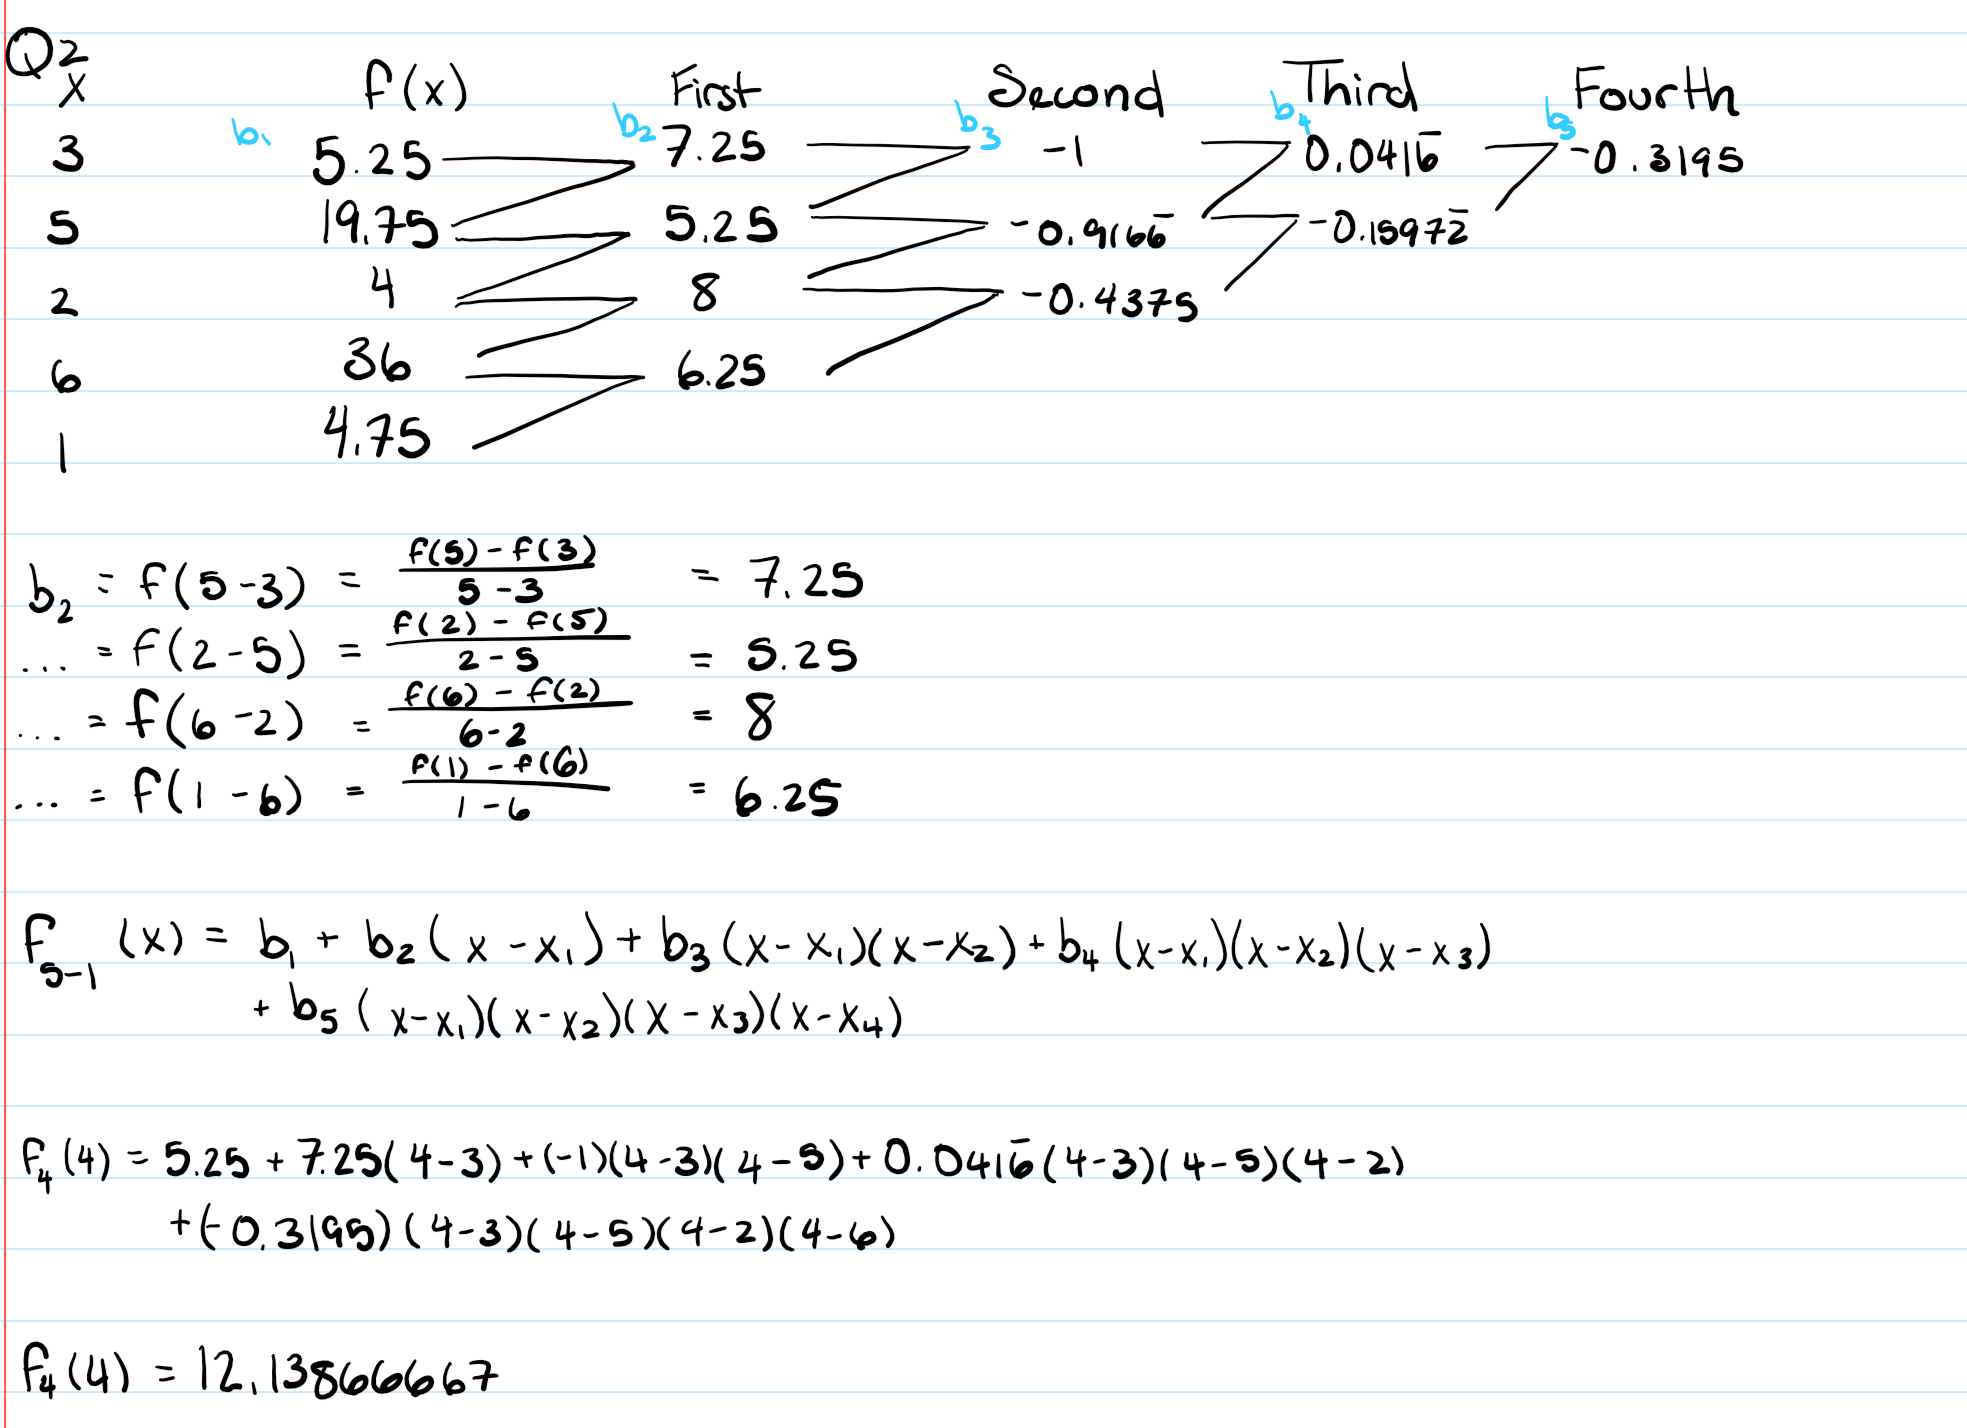

# Q3

The following data is available:
\begin{align*}
&x&&3 &&5 &&2 &&6 &&1\\
&f(x)&&5.25 &&19.75 && 4&& 36&& 4.75
\end{align*}
Calculate $f(4)$ using 

1. Lagrange interpolating polynomials of order 1 through 3 by hand.
2. Compare your results from (1) with python function `lagrangeInt`.

In [ ]:
# Q3 Answer
x=np.array([3.,5.,2.,6.,1.])
fx=np.array([5.25,19.75,4.,36.,4.75])
x1 = 4
yy = lagrangeInt(x, fx, x1)
print(x)
print(fx)
print('Interpolated fx(', x1,') =', yy)


[3. 5. 2. 6. 1.]
[ 5.25 19.75  4.   36.    4.75]
Interpolated fx( 4 ) = 10.0


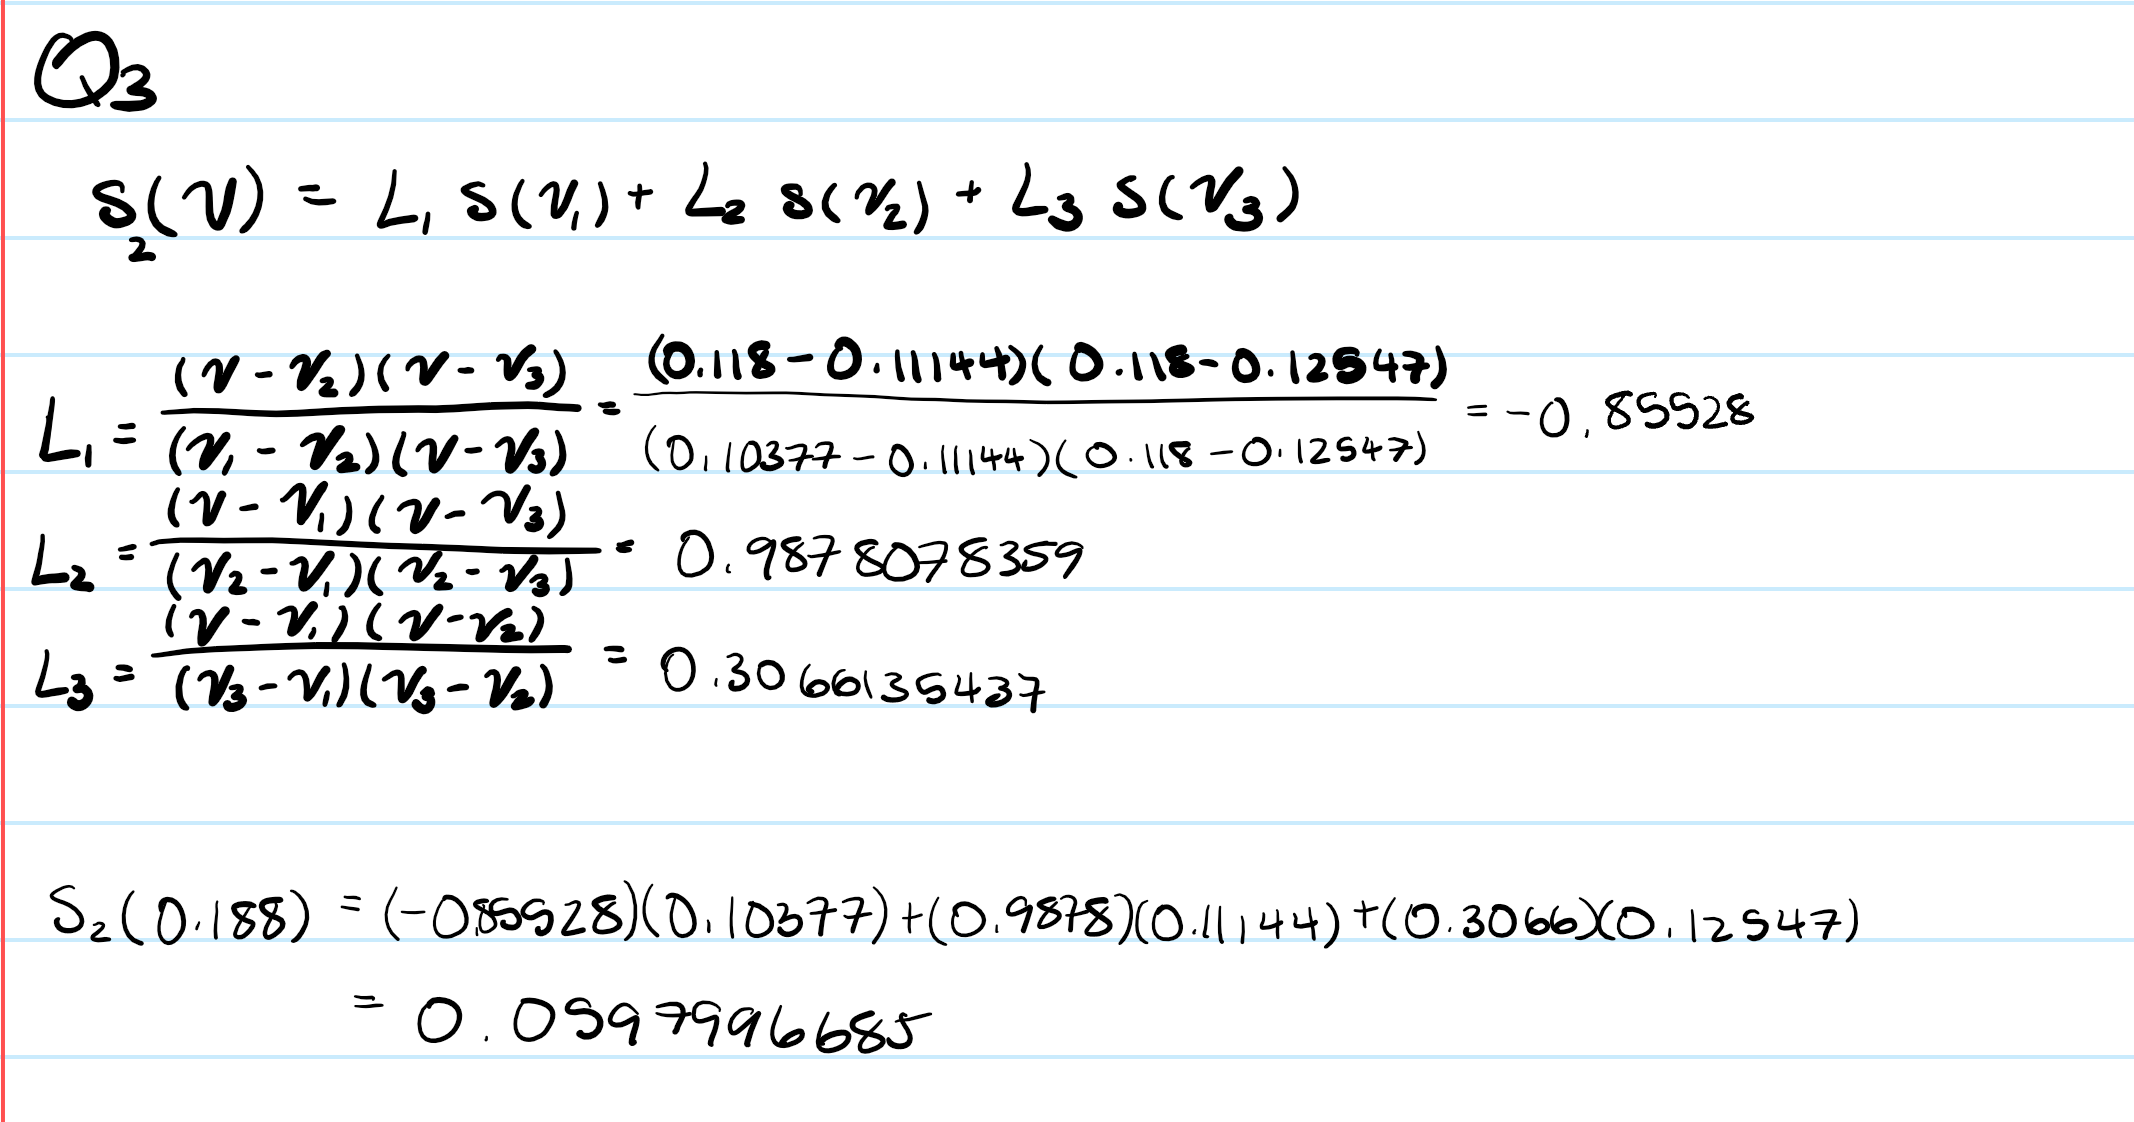

# Q4
Use the portion of the given steam table for superheated water at $200$ MPa to find the corresponding entropy $s$ for a specific volume $v$ of $0.118$ $\rm{m^{3}/kg}$ using
1. linear interpolation (by hand),
2. quadratic interpolation using python `polyfit`
3. using the function `newtonInt`
4. using the function `lagrangeInt`


\begin{align*}
&v\, [\rm{m^{3}/kg}] && 0.10377 &&\qquad 0.11144 &&\qquad 0.12547\\
&s\, [kJ/(kg.K)] && 6.4147 &&\qquad 6.5453 &&\qquad 6.7664
\end{align*}


In [ ]:
# Q4 Answer

x=np.array([.10377, .11144, .12547])
y=np.array([6.4147, 6.5453, 6.7664])
print('x= ', x)
print('y= ', y)
x1 = .118

p1=np.polyfit(x,y,2)       
sp=np.polyval(p1, 0.118)
print('polyfit(polyval):                      ',sp) 

yy = newtonInt(x, y, x1)
print('newtonInt:    Interpolated y(', x1,') =', yy)


yy1 = lagrangeInt(x, y, x1)
print('langrangeInt: Interpolated y(', x1,') =', yy1)


x=  [0.10377 0.11144 0.12547]
y=  [6.4147 6.5453 6.7664]
polyfit(polyval):                       6.651543686693506
newtonInt:    Interpolated y( 0.118 ) = 6.6515436866935
langrangeInt: Interpolated y( 0.118 ) = 6.6515436866935005


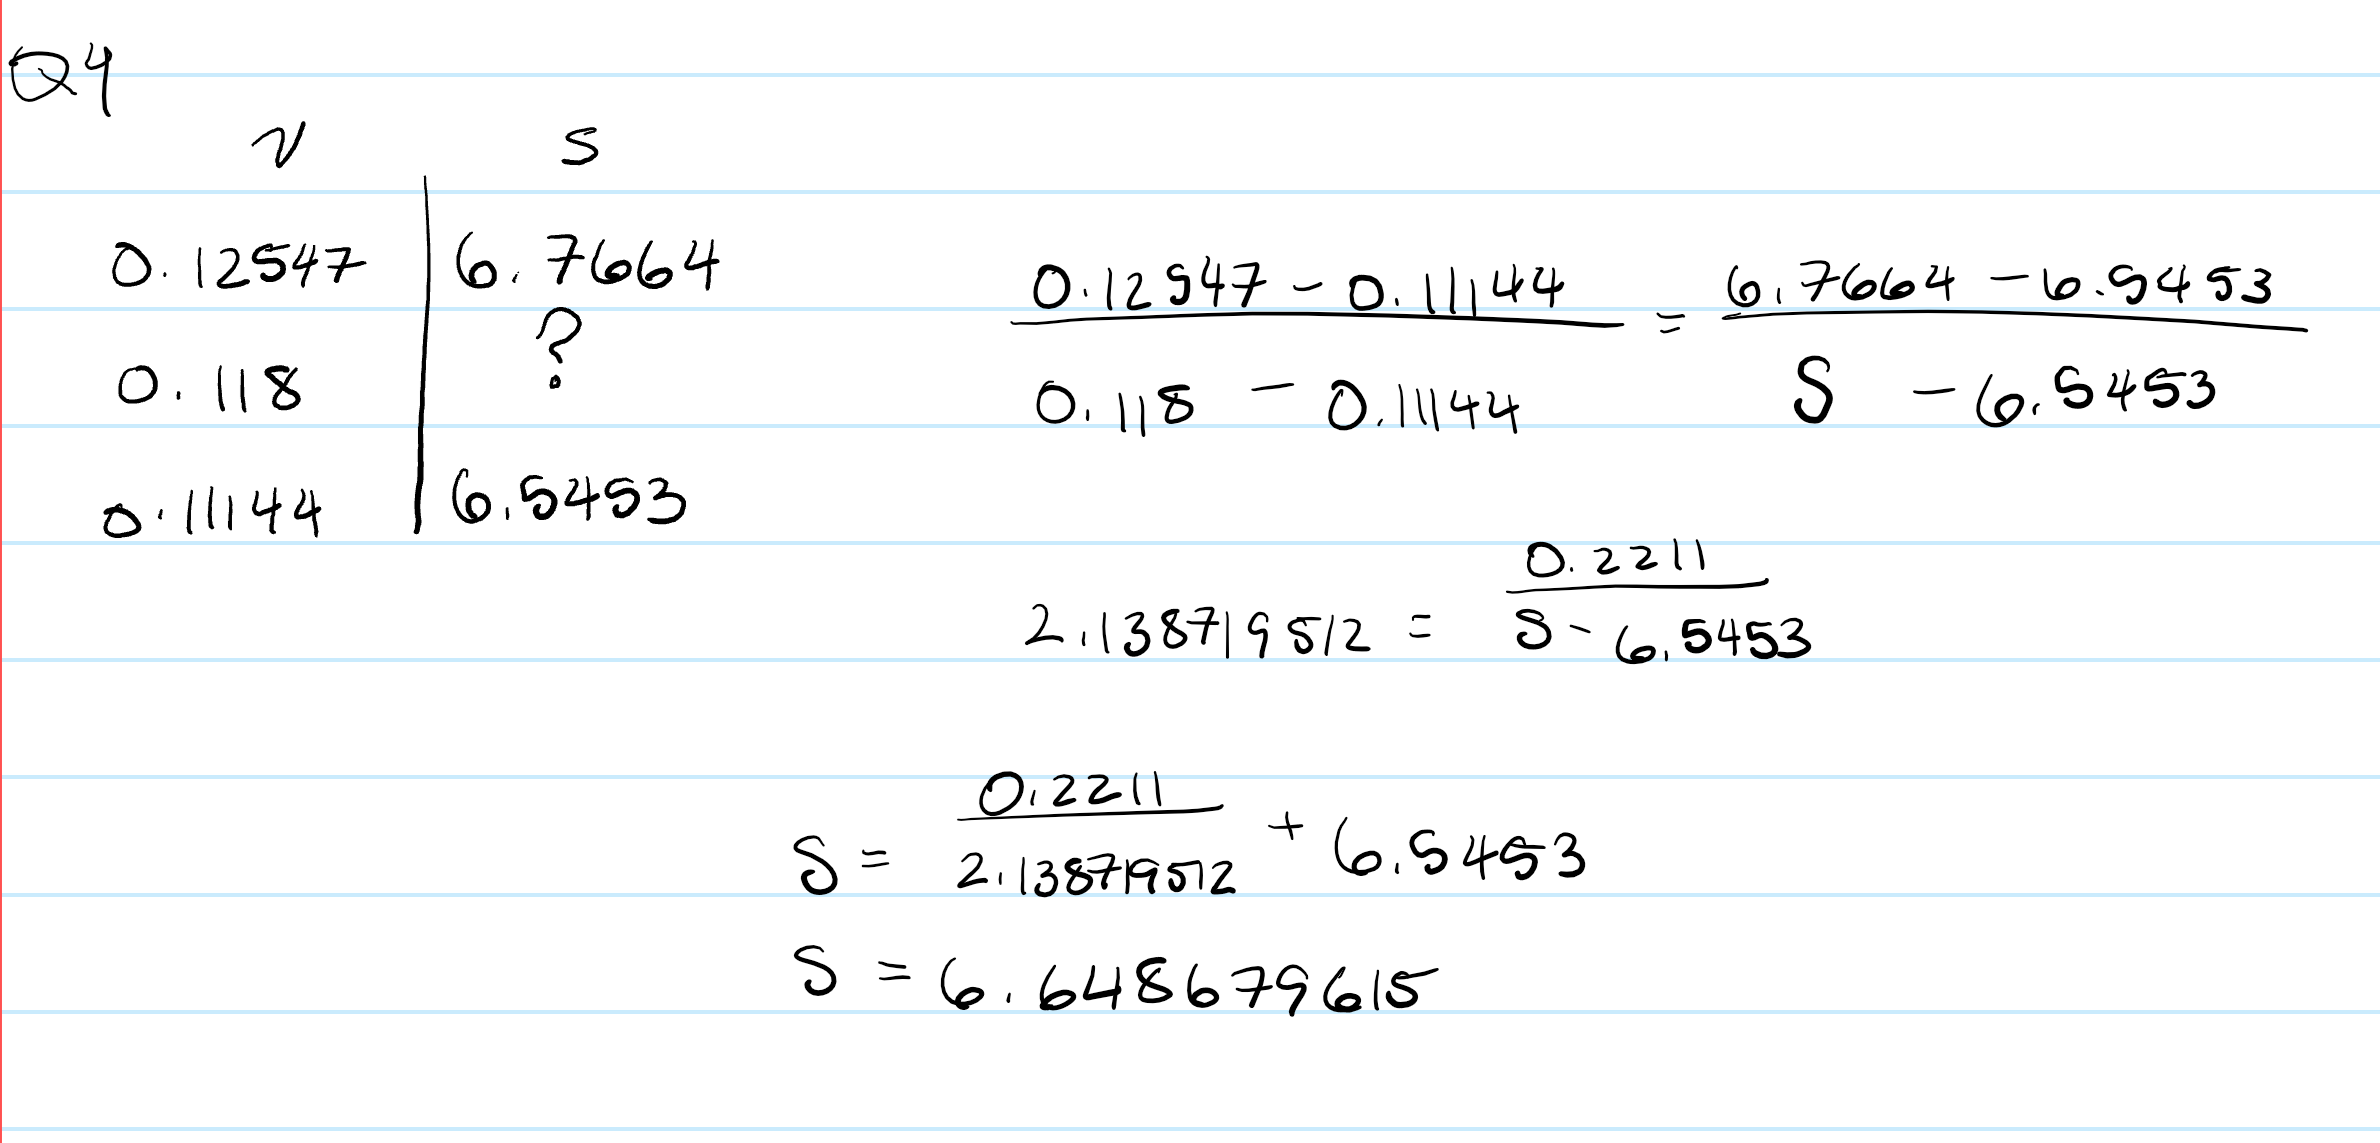

# Q5

Consider this function
\begin{equation}
f(x)=\frac{1}{(x-0.3)^{2}+0.01}+\frac{1}{(x-0.9)^{2}+0.04}-6
\end{equation}
Generate 11 data points using this function in the interval between $0$ and $1$ and then fit them with a cubic spline function. It appears that the `natural` end condition provides a better behavior of the spline curve than `not-a-knot` near the end points. Create a plot comparing the fit with the exact function. Calculate the interpolated value of the function at $x=0.05$. Compare this value with that from the exact function and verify that the `natural` end condition provides a better prediction of the function near the end point than  the `not-a-knot` condition.


x=  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
fx=  [ 5.17647059 15.47058824 45.88679245 96.5        47.44827586 19.
 11.69230769 12.38235294 17.84615385 21.7027027  16.        ]
exact solution:  9.104578858111928
function value at x = 0.05 is :  11.037682411219748


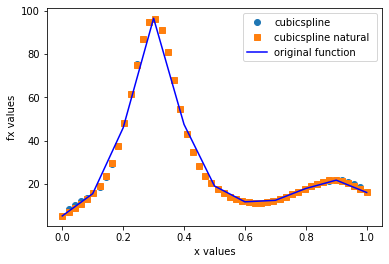

natural:  9.594244088036053


In [ ]:
# Q5 Answer
# Q5 Answer
x = np.linspace(0,1,11)
fx = np.zeros
y = lambda x: (1 / ((x - 0.3)**2 +0.01)+ 1 / ((x-0.9)**2 + 0.04)- 6)
fx= y(x)
print('x= ',x)
print('fx= ',fx)
print('exact solution: ', y(0.05))

cs = CubicSpline(x, fx)
x1 = 0.05
fx1 = cs(x1)
print('function value at x = 0.05 is : ', fx1)
xp = np.linspace(np.min(x),np.max(x))
yp = cs(xp)
sp = CubicSpline(x, fx , bc_type = 'natural') 
yp1 = sp(xp)
plt.plot(xp,yp,'o',label='cubicspline')
plt.plot(xp,yp1,'s', label='cubicspline natural ')
plt.plot(x,y(x),'b',label='original function')
plt.xlabel('x values')
plt.ylabel('fx values')
plt.legend(loc='best')
plt.show()
print('natural: ', sp(.05))